In [1]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

Functions for working with vectors

In [2]:
v = [1, 2, 3]
w = [2, 1, 5]

In [3]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [4]:
vector_add(v, w)

[3, 3, 8]

In [5]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

In [6]:
vector_subtract(v, w)

[-1, 1, -2]

In [7]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [8]:
vectors = [v,w]
vector_sum(vectors)

[3, 3, 8]

In [9]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [10]:
scalar_multiply(5, v)

[5, 10, 15]

In [11]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [12]:
vector_mean(vectors)

[1.5, 1.5, 4.0]

In [13]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [14]:
dot(v, w)

19

In [15]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [16]:
sum_of_squares(v)

14

In [17]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [18]:
magnitude(v)

3.7416573867739413

In [19]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

In [20]:
squared_distance(v, w)

6

In [21]:
def distance(v, w):
   return math.sqrt(squared_distance(v, w))

In [22]:
distance(v, w)

2.449489742783178

Functions for working with matrices

In [23]:
A =[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

In [24]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [25]:
shape(A)

(3, 3)

In [26]:
def get_row(A, i):
    return A[i]

In [27]:
get_row(A, 0)

[1, 2, 3]

In [28]:
def get_column(A, j):
    return [A_i[j] for A_i in A]

In [29]:
get_column(A, 2)

[3, 6, 9]

In [30]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

In [31]:
def sqrt_index(i, j):
    return i^j

In [32]:
m1 = make_matrix(5, 5, sqrt_index)
m1

[[0, 1, 2, 3, 4],
 [1, 0, 3, 2, 5],
 [2, 3, 0, 1, 6],
 [3, 2, 1, 0, 7],
 [4, 5, 6, 7, 0]]

In [33]:
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

In [34]:
m2 = make_matrix(5, 5, is_diagonal)
m2

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [35]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)

In [36]:
matrix_add(m1, m2)

[[1, 1, 2, 3, 4],
 [1, 1, 3, 2, 5],
 [2, 3, 1, 1, 6],
 [3, 2, 1, 1, 7],
 [4, 5, 6, 7, 1]]

Graph dot product as vector projection

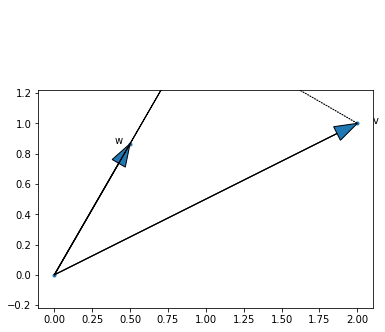

In [37]:
v = [2, 1]
w = [math.sqrt(.25), math.sqrt(.75)]
c = dot(v, w)
vonw = scalar_multiply(c, w)
o = [0,0]

plt.arrow(0, 0, v[0], v[1], width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
plt.arrow(0 ,0, w[0], w[1],
              width=0.002, head_width=.1, length_includes_head=True)
plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1],
              linestyle='dotted', length_includes_head=True)
plt.scatter(*zip(v,w,o),marker='.')
plt.axis('equal')
plt.show()